# Programming with Images | Image Acquisition

Every day, people work with a large variety of digital raster images such as color photographs of people and landscapes, grayscale scans of printed documents, building plans, faxed documents, screenshots, medical images such as x-rays and ultrasounds, and a multitude of others.

Despite all the different sources for these images, they are all, as a rule, ultimately represented as rectangular ordered arrays of image elements.

The process by which a scene becomes a digital image is varied and complicated, and, in most cases, the images you work with will already be in digital form, so we only outline here the essential stages in the process.

## The Pin Hole Camera Model**

The pinhole camera is one of the simplest camera models and has been in use since the 13th century, when it was known as the Camera Obscura. While pinhole cameras have no practical use today except to hobbyists, they are a useful model for understanding the essential optical components of a simple camera.

![Girl With a Pearl Earring](http://www.galleryintell.com/wp-content/uploads/2013/03/Jan_Vermeer-Girl_with_a_pearl_earring-galleryIntell-e1362631184589.jpg)


IMDB: Girl with a Pearl Earring (2003). Check it
http://www.imdb.com/title/tt0335119/
Youtube: https://www.youtube.com/watch?v=P8Xlo1GilbE

The pinhole camera consists of a closed box with a small opening on the front side through which light enters, forming an image on the opposing wall. The light forms a smaller, inverted image of the scene.

Pinhole Camera Model         |  
:-------------------------:|:-------------------------:
<img src="book_folder/pinhole.png" width="800" height="600"> |
<center>Figure 1: Pinhole Camera Model.</center>

The optical axis runs through the pinhole perpendicular to the image plane. We assume a visible object located at a horizontal distance Z from the pinhole and vertical distance Y from the optical axis. The height of the projection y is determined by two parameters:
- the (fixed) depth of the camera box f;
- the distance Z of the object from the origin of the coordinate system.

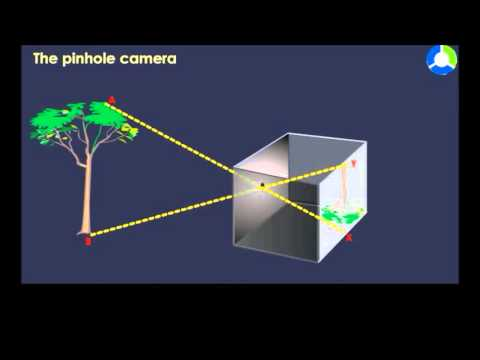

In [9]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('pvYZbGQCe9Q')

## The Thin Lens Model**

One of the problems with the pinhole camera is that it requires a very small opening to produce a sharp image. This in turn severely limits the amount of light passed through and thus leads to extremely long exposure times. In reality, glass lenses or systems of optical lenses are used whose optical properties are greatly superior in many aspects. We can still make our model more realistic, without unduly increasing its complexity, by replacing the pinhole with a thin lens.

Pinhole Camera Model         |  
:-------------------------:|:-------------------------:
<img src="book_folder/thinlens.png" width="600" height="400"> |
<center>Figure 2: Thin Lens Camera Model.</center>

The lens is assumed to be symmetric and infinitely thin, such that all light rays passing through it are refracted at a virtual plane in the middle of the lens. The resulting image geometry is practically the same as that of the pinhole camera.
This model is not sufficiently complex to encompass the physical details of actual lens systems, such as geometrical distortions and the distinct refraction properties of different colors.

# Spatial Sampling

The spatial sampling of an image (that is, the conversion of the continuous signal to its discrete representation) depends on the geometry of the sensor elements of the acquisition device (e. g., a digital or video camera). The individual sensor elements are usually arranged as a rectangular array on the sensor plane.

Other types of image sensors, which include hexagonal elements and circular sensor structures, can be found in specialized camera products.

Temporal sampling is carried out by measuring at regular intervals the amount of light incident on each individual sensor element. The CCD or CMOS sensor in a digital camera does this by triggering an electrical charging process induced by the continuous stream of photons, and then measuring the amount of charge that built up in each sensor element during the exposure time.

In order to store and process the image values on the computer they are commonly converted to a range of integer values (for example, 256 = 28 or 4096 = 212 ). Occasionally a floating-point scale is used in professional applications such as medical imaging. Conversion is carried out using an analog to digital converter, which is typically embedded directly in the sensor electronics or is performed by special interface hardware.

**Images as Discrete Functions**

The result of these three stages is a description of the image in the form of a 2D ordered matrix of integers. A digital image I is a 2D function of integer coordinates $NxN$ that maps to a range of possible image (pixel) values P , such that $I(u,v) \in P \text{ and } u,v \in N$.

**Image Size and Resolution**

We assume rectangular images, and while that is a relatively safe assumption, exceptions do exist. The size of an image is determined directly from the width M (number of columns) and the height N (number of rows) of the image matrix I.

The resolution of an image specifies the spatial dimensions of the image in the real world and is given as the number of image elements per measurement:
- dots per inch (dpi) or lines per inch (lpi) for print production;
- pixels per kilometer for satellite images.

In most cases, the resolution of an image is the same in the horizontal and vertical directions, which means that the image elements are square. Note that this is not always the case as, for example, the image sensors of most current video cameras have non-square pixels!

The spatial resolution of an image may not be relevant in many basic image processing steps, such as point operations or filters.

Image Size and Resolution         |  
:-------------------------:|:-------------------------:
<img src="book_folder/resolution.png" width="600" height="400"> |
<center>Figure 3: Image Size and Resolution.</center>

Precise resolution information is, however, important in cases where geometrical elements such as circles need to be drawn on an image or when distances within an image need to be measured.

For these reasons, most image formats and software systems designed for professional applications rely on precise information about image resolution.

## Image Coordinate System

In order to know which position on the image corresponds to which image element, we need to impose a coordinate system. Contrary to normal mathematical conventions, in image processing the coordinate system is usually flipped in the vertical direction; that is, the y-coordinate runs from top to bottom and the origin lies in the upper left corner.

Image Coordinate System         |  
:-------------------------:|:-------------------------:
<img src="book_folder/coordinate.png" width="600" height="400"> |
<center>Figure 4: Image Coordinate System.</center>

While this system has no practical or theoretical advantage, and in fact may be a bit confusing in the context

of geometrical transformations, it is used almost without exception in imaging software systems.
The system supposedly has its roots in the original design of television broadcast systems, where the picture rows are numbered along the vertical deflection of the electron beam, which moves from the top to the bottom of the screen.

**Pixel Values**

The information within an image element depends on the data type used to represent it.
Pixel values are practically always binary words of length k so that a pixel can represent any of 2k different values. The value k is called the bit depth (or just “depth”) of the image.

The exact bit-level layout of an individual pixel depends on the kind of image; for example, binary, grayscale, or RGB color. The properties of some common image types are summarized as follows:

Pixel Values        |  
:-------------------------:|:-------------------------:
<img src="book_folder/pixelvalues.png" width="600" height="600"> |
<center>Figure 5: Pixel Values.</center>

# Grayscale Images

The image data in a grayscale image consist of a single channel that represents the intensity, brightness, or density of the image. In most cases, only positive values make sense, as the numbers represent the intensity of light energy or density of film and thus cannot be negative, so typically whole integers in the range of [0 . . . 2k−1] are used.

For example, a typical grayscale image uses k = 8 bits (1 byte) per pixel and intensity values in the range of [0 . . . 255], where the value 0 represents the minimum brightness (black) and 255 the maximum brightness (white).

A RGB-encoded color image with an 8-bit depth would require 8 bits for each channel for a total of 24 bits, while the same image with a 12-bit depth would require a total of 36 bits.


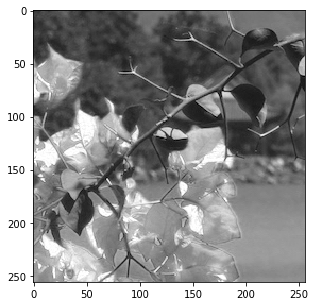

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))

img_array = plt.imread('image_folder/westlake256.jpg')
lum_img = img_array[:,:,0]


plt.imshow(lum_img, cmap='gray')

# Binary Images

Binary images are a special type of intensity image where pixels can only take on one of two values, black or white. These values are typically encoded using a single bit (0/1) per pixel. Binary images are often used for representing line graphics, archiving documents, encoding fax transmissions, and of course in electronic printing.

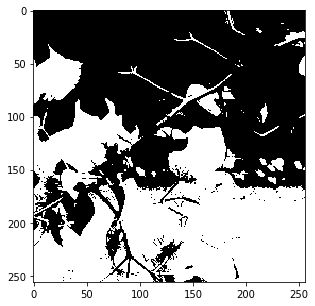

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.figure(figsize=(5,5))

img_array = plt.imread('image_folder/westlake256.jpg')
lum_img = img_array[:,:,0]

thresh = 127
im_bw = cv2.threshold(lum_img, thresh, 255, cv2.THRESH_BINARY)[1]


plt.imshow(im_bw,cmap='gray')

# Color Images

Most color images are based on the primary colors red, green, and blue (RGB), typically making use of 8 bits for each color component. In these color images, each pixel requires 3×8 = 24 bits to encode all three components, and the range of each individual color component is [0 . . . 255]. As with intensity images, color images with 30, 36, and 42 bits per pixel are commonly used in professional applications.

While most color images contain three components, images with four or more color components are common in prepress applications, based on the subtractive CMYK (Cyan-Magenta-Yellow-Black) color model.

Indexed or palette images constitute a very special class. The difference between an indexed image and a true color image is the number of different colors that can be used in a particular image.


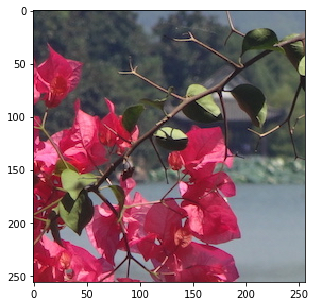

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))

img_array = plt.imread('image_folder/westlake256.jpg')
#lum_img = img_array[:,:,0]


plt.imshow(img_array)

# Special Images

Special images are required if none of the above standard formats is sufficient for representing the image values.

Two common examples of special images are those with:
- negative values;
- floating-point values.

Images with negative values arise during image-processing steps, such as filtering for edge detection, and images with floating-point values are often found in medical, biological or astronomical applications, where extended numerical range and precision are required. These special formats are mostly application specific and thus may be difficult to use with standard image-processing tools.

Files provide the essential mechanism for storing, archiving, and exchanging image data, and the choice of the correct file format is an important decision.

In the early days of digital image processing (that is, before around 1985), most software developers created a new custom file format for almost every new application they developed. The result was a chaotic jumble of incompatible file formats that for a long time limited the practical sharing of images between research groups.

Today there exist a wide range of standardized file formats, and developers can always find an existing format that is suitable for their application. Using standardized file formats vastly increases the ease with which images can be exchanged and the likelihood that the images will be readable by other softwares.

# Image File Formats

The following are a few of the typical criteria that need to be considered when selecting an appropriate file format:
- Type of image: These include black and white images, grayscale images, scans from documents, color images, color graphics, and special images such as those using floating-point image data.
- Storage size and compression: Are the storage requirements of the file a potential problem, and is the image compression method, especially when considering lossy compression, appropriate?
- Compatibility: How important is the exchange of image data? And for archives, how important is the long-term machine readability of the data?
- Application domain: In which domain will the image data be mainly used? Are they intended for print, Web, film, computer graphics, medicine, or astronomy?

**Raster versus Vector**

In this course we will deal exclusively with file formats for storing raster images; that is, images that contain pixel values arranged in a regular matrix using discrete coordinates. Vector graphics represent geometric objects using continuous coordinates, which are only rasterized once they need to be displayed on a physical device such as a monitor or printer.

A number of standardized file formats exist for vector images, such as SVG (Scalable Vector Graphics) as well as proprietary formats such as DXF (Drawing Exchange Format from AutoDesk), AI (Adobe Illustrator), PICT (QuickDraw Graphics Metafilefrom Apple) and WMF/EMF (Windows Metafile and Enhanced Metafile from Microsoft). Most of these formats can contain both vector data and raster images in the same file. The PS (PostScript) and EPS (Encapsulated PostScript) formats as well as the PDF (Portable Document Format) also offer this possibility, though they are usually used for printer output and archival purposes.

## TIFF

This is a widely used file format designed to meet the professional needs of diverse fields. The format supports a range of grayscale, indexed, and true color images, but also special image types with large-depth integer and floating-point elements.

A TIFF file can contain a number of images with different properties. The TIFF specification provides a range of different compression methods (LZW, ZIP, CCITT, and JPEG) and color spaces, so that it is possible, for example, to store a number of variations of an image in different sizes and representations together in a single TIFF file.

The flexibility of TIFF has made it an almost universal exchange format that is widely used in archiving documents, scientific applications, digital photography, and digital video production.

https://www.fileformat.info/format/tiff/egff.htm

## GIF

GIF is essentially an indexed image file format designed for color and gray scale images with a maximum depth of 8 bits and consequently it does not support true color images. It offers efficient support for encoding palettes containing from 2 to 256 colors, one of which can be marked for transparency. GIF supports color palletes in the range of 2 . . . 256, enabling pixels to be encoded using fewer bits.

As an example, the pixels of an image using 16 unique colors require only 4 bits to store the 16 possible color values [0 . . . 15]. This means that instead of storing each pixel using one byte, as done in other bitmap formats, GIF can encode two 4-bit pixels into each 8-bit byte. This results in a 50% storage reduction over the standard 8-bit indexed color bitmap format. The GIF file format is designed to efficiently encode flat or iconic images consisting of large areas of the same color.

https://www.fileformat.info/format/gif/egff.htm

## PNG

PNG was originally developed as a replacement for the GIF file format when licensing issues arose because of its use of LZW compression. It was designed as a universal image format especially for use on the Internet, and, as such, PNG supports three different types of images: true color (with up to 3 × 16 bits/pixel), grayscale (with up to 16 bits/pixel), and indexed (with up to 256 colors)

PNG includes an alpha channel for transparency with a maximum depth of 16 bits. The transparency channel of a GIF image is only a single bit deep. While the format only supports a single image per file, it is exceptional in that it allows images of up to 230×230 pixels. The format supports lossless compression by means of a variation of PKZIP. No lossy compression is available, as PNG was not designed as a replacement for JPEG. Ultimately the PNG format meets or exceeds the capabilities of the GIF format in every way except GIF’s ability to include multiple images in a single file to create simple animations.

https://www.fileformat.info/format/png/egff.htm

## JPG

The JPEG standard defines a compression method for continuous grayscale and color images, such as those that would arise from nature photography. The format was developed by the Joint Photographic Experts Group (JPEG) with the goal of achieving an average data reduction of a factor of 1:16 and was established in 1990 as ISO Standard IS-10918.
Today it is the most widely used image file format. In practice, JPEG achieves, depending on the application, compression in the order of 1 bit per pixel (that is, a compression factor of around 1:25) when compressing 24-bit color images to an acceptable quality for viewing.

The JPEG standard supports images with up to 256 color components, and what has become increasingly important is its support for CMYK images.

In the case of RGB images, the core of the algorithm consists of three main steps:
1. Color conversion and down sampling: A color transformation from RGB into the YCbCr space is used to separate the color components from Y component. Since the human visual system is less sensitive to rapid changes in color, it is possible to compress the color components more, resulting in a significant data reduction, without a subjective loss in image quality.
2. Cosine transform and quantization in frequency space: The image is divided up into a regular grid of 8 blocks, and for each independent block, the frequency spectrum is computed using the discrete cosine transformation. Next, the 64 spectral coefficients of each block are quantized into a quantization table. The size of this table largely determines the eventual compression ratio, and therefore the visual quality, of the image.
3. Lossless compression: Finally, the quantized spectral components data stream is again compressed using a lossless method, such as arithmetic or Huffman encoding, in order to remove the last remaining redundancy in the data stream.

Drawbacks of the JPEG compression algorithm include:
- limitation to 8-bit images;
- poor performance on non-photographic images such as line art (for which it was not designed);
- handling of abrupt transitions within an image;
- striking artifacts caused by the 8 × 8 pixel blocks at high compression rates.

https://www.fileformat.info/format/jpeg/egff.htm

## JPG 2000

JPEG-2000, which is specified by an ISO-ITU standard (“Coding of Still Pictures”), was designed to overcome some of the better-known weaknesses of the traditional JPEG codec.

Among the improvements made in JPEG-2000 are the use of larger, 64 × 64 pixel blocks and replacement of the discrete cosine transform by the wavelet transform. These and other improvements enable it to achieve significantly higher compression ratios than JPEG—up to 0.25 bit/pixel on RGB color images.

Despite these advantages, JPEG-2000 is supported by only a few image-processing applications and Web browsers.

## BMP and PBM

The Windows Bitmap (BMP) format is a simple, and under Windows widely used, file format supporting grayscale, indexed, and true color images. It also supports binary images, but not in an efficient manner since each pixel is stored using an entire byte. Optionally, the format supports simple lossless, run length- based compression. While BMP offers storage for a similar range of image types as TIFF, it is a much less flexible format.

The PBM family consists of a series of very simple file formats that are exceptional in that they can be optionally saved in a human-readable text format that can be easily read in a program or simply edited using a text editor.

https://www.fileformat.info/format/bmp/egff.htm
https://www.fileformat.info/format/pbm/egff.htm


# To Read Further

- Resolution is the capability of the sensor to observe or measure the smallest object clearly with distinct boundaries. There is a difference between the resolution and a pixel. A pixel is actually a unit of the digital image. Resolution depends upon the size of the pixel. The term resolution is often used for a pixel count in digital imaging, even though American, Japanese, and international standards specify that it should not be so used, at least in the digital camera field. Check the video https://vimeo.com/videoschool/lesson/186/the-basics-of-image-resolution
- Check http://h3stogram.herokuapp.com/
- Want to make your own pin hole camera? Check the DIRKON at
http://www.pinhole.cz/en/pinholecameras/dirkon_01.html
- Take a look at the Cambridge in Colour material at http://www.cambridgeincolour.com/tutorials/color-
spaces.htm Please mind that the colors we see are difficult to map into an ideal model.

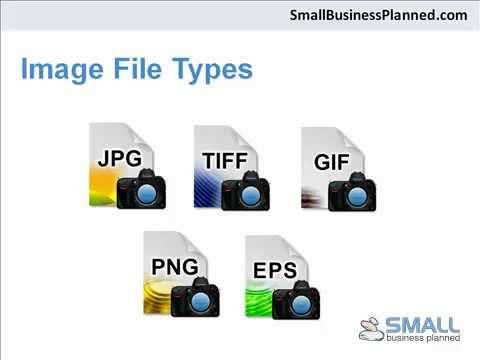

In [23]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('maqbhJx3H4E')